In [7]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Boundary and initial conditions
# Temperatures
T_gasPurifier_WC = 373 #K
T_gasPurifier_OC = 323 #K
T_surface = 293 #K

# Lengths
L = np.linspace(0,2,200) #m

# Radii
D_o = 0.00635 #m
r_o = D_o/2 #m
r_i = r_o - 0.0012446 #m
D_i = 2 * r_i #m

# Thermal/material properties
viscosity_WC = 2.42E-5 #kg/m/s
viscosity_OC = 2.73E-5 #kg/m/s
heat_cap = 520 #J/kg/K
k_Ar = 0.0179 #W/mK
density = 1.664 #kg/m^3

# Calculate the mass flow rate based on worst case (5slpm) and opertation case (3slpm)
m_dot_WC = 5 * 1/60 * 0.001 * density
m_dot_OC = 3 * 1/60 * 0.001 * density

# Find the flow regime by calculating Reynold's number
Re_WC = (4*m_dot_WC)/(np.pi*D_i*viscosity_WC)
Re_OC = (4*m_dot_OC)/(np.pi*D_i*viscosity_OC)
if (Re_WC < 2300):
    print("Worst case has laminar flow")
if (Re_OC < 2300):
    print("Operational case has laminar flow")

# Find favoured thermal transmission through Prandtl number
Pr_WC = (heat_cap*viscosity_WC)/k_Ar
Pr_OC = (heat_cap*viscosity_OC)/k_Ar
if (Re_WC < 1):
    print("Thermal conduction is dominant")
if (Re_OC < 1):
    print("Thermal conduction is dominant")

# Find the length it takes for the flow to fully develop
x_WC = 0.05 * D_i * Pr_WC * Re_WC
x_OC = 0.05 * D_i * Pr_OC * Re_OC

# Find the heat transfer coefficient using the Nusselt number
Nu_WC = 3.66 + (0.065*(D_i)*Re_WC*Pr_WC)/(1+0.04*((D_i)*Re_WC*Pr_WC)**(2/3))
h_WC = (Nu_WC*k_Ar)/D_i #W/m^2K

Nu_OC = 3.66 + (0.065*(D_i)*Re_OC*Pr_OC)/(1+0.04*((D_i)*Re_OC*Pr_OC)**(2/3))
h_OC = (Nu_OC*k_Ar)/D_i #W/m^2K

# Find the final temperature
T_final_WC = T_surface - (T_surface - T_gasPurifier_WC) * np.exp((-h_WC*np.pi*D_i)/(m_dot_WC*heat_cap))
T_final_OC = T_surface - (T_surface - T_gasPurifier_OC) * np.exp((-h_OC*np.pi*D_i)/(m_dot_OC*heat_cap))

print("Final temperature of worst case for 1m of piping = ",T_final_WC,"K")
print("Final temperature of operational case for 1m of piping = ",T_final_OC,"K")

Worst case has laminar flow
Operational case has laminar flow
Final temperature of worst case for 1m of piping =  296.65212788156146 K
Final temperature of operational case for 1m of piping =  293.2027501608171 K


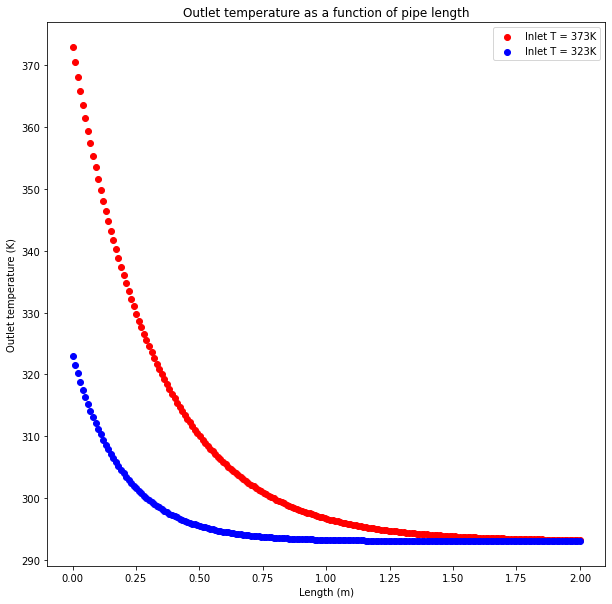

In [9]:
# Vary the length
T_final_WC = T_surface - (T_surface - T_gasPurifier_WC) * np.exp((-h_WC*np.pi*D_i*L)/(m_dot_WC*heat_cap))
T_final_OC = T_surface - (T_surface - T_gasPurifier_OC) * np.exp((-h_OC*np.pi*D_i*L)/(m_dot_OC*heat_cap))

# Plot the temperature as a function of pipe length
TvL = plt.figure(figsize=(10,10))
TvL = plt.title("Outlet temperature as a function of pipe length")
TvL = plt.xlabel("Length (m)")
TvL = plt.ylabel("Outlet temperature (K)")
TvL = plt.scatter(L,T_final_WC,c='red',label='Inlet T = 373K')
TvL = plt.scatter(L,T_final_OC,c='blue',label='Inlet T = 323K')
TvL = plt.legend(loc='best')
TvL = plt.show()